In [1]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam

print(tf.__version__)
print(keras.__version__)

2.18.0
3.8.0


In [2]:
# download the dataset
fmnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

# scaling into 0 - 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# print the data shape
print(x_train.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


---
Label | Description
---
0 T-shirt/top

---
1 Trouser

---
2 	Pullover

---
3 	Dress

---
4 	Coat

---
5 	Sandal

---
6 	Shirt

---
7 	Sneaker

---
8 	Bag

---
9 	Ankle boot


Label:  7


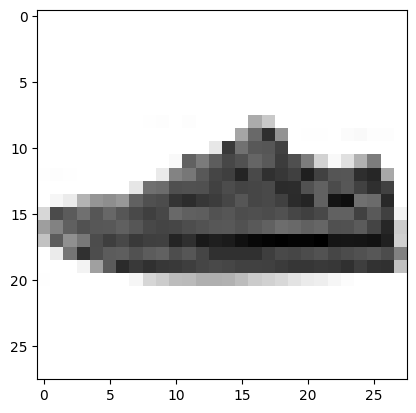

In [3]:
import matplotlib.pyplot as plt

print("Label: ", y_train[32132])
plt.imshow(x_train[32132], cmap=plt.cm.binary)
plt.show()

In [4]:
import numpy as np

num_classes = len(np.unique(y_train))
num_classes

10

In [5]:
# Create a Sequential model
model = tf.keras.models.Sequential()

# Flattens the 2D image input (28x28 pixels) into a 1D vector of size 784
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# A 28×28 image → [[0.0, ..., 0.1], ..., [0.2, ..., 0.3]] → becomes → [0.0, ..., 0.3] (shape: (784,))

# Stack 5 fully connected (Dense) hidden layers, each has 128 neurons and uses the ReLU activation (ReLU = max(0, x))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) # 20% neurons dropped
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2)) # 20% neurons dropped
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu'))

# The output layer has num_classes neurons (e.g., 10 for digits 0–9)
# The softmax activation turns the output into probabilities that sum to 1. The highest value indicates the predicted class
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# learning_rate → a hyperparameter that scales how much the model weights change with respect to the loss gradient.
# Too high → may cause unstable training.
# Too low → may train too slowly or get stuck.
# 0.001 Standard for Adam


In [7]:
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7170 - loss: 0.7882
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8341 - loss: 0.4680
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8499 - loss: 0.4134
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8589 - loss: 0.3921
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8684 - loss: 0.3718
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8743 - loss: 0.3517
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8784 - loss: 0.3388
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8813 - loss: 0.3316
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8865 - loss: 0.3118
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8885 - loss: 0.3044
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8936 - loss: 0.2933
Epoch 12/30
1875/1875

In [25]:
model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8911 - loss: 0.3329


[0.3301733732223511, 0.8907999992370605]

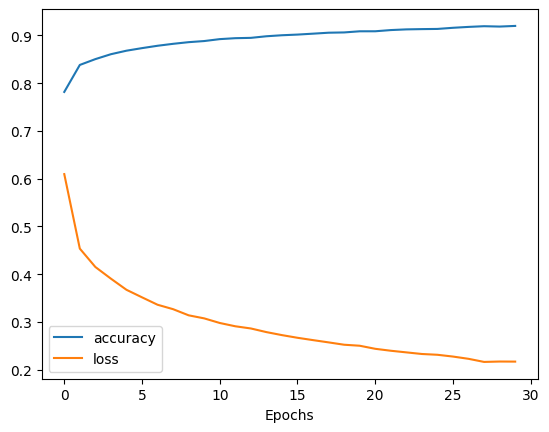

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'])
plt.show()

Label  2


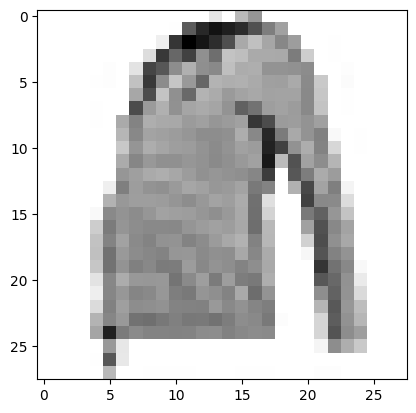


Label  1


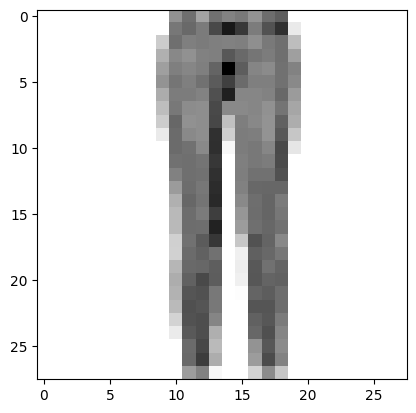


Label  7


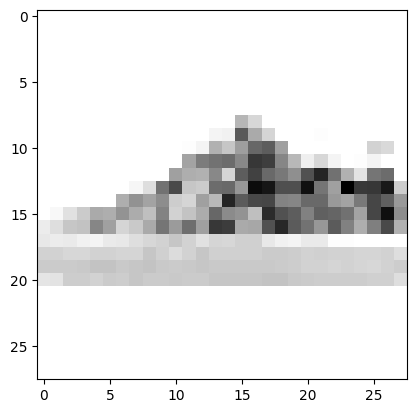


Label  9


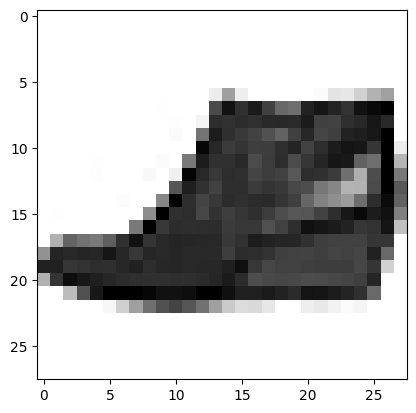


Label  5


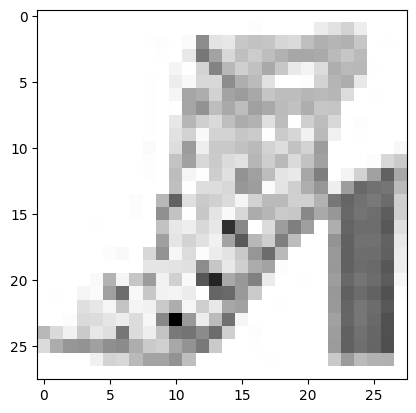

In [51]:
# conducting inference
samples_idx = [48, 453, 3185, 6729, 8423]
to_pred = []
img_width = 28
img_height = 28

for idx in samples_idx:
  reshape_img = x_test[idx].reshape(img_width, img_height)
  print("Label ", y_test[idx])
  plt.imshow(reshape_img, cmap=plt.cm.binary)
  plt.show()
  print("")
  to_pred.append(reshape_img)

In [52]:
to_pred = np.array(to_pred)
print(to_pred.shape)

(5, 28, 28)


In [53]:
prediction = model.predict(to_pred)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[4.15404048e-03, 3.48444473e-07, 5.92787981e-01, 3.45332170e-04,
        1.26891900e-02, 1.00484649e-05, 3.89966190e-01, 5.15449346e-06,
        3.82714425e-05, 3.52520738e-06],
       [8.06799516e-09, 9.99999881e-01, 5.01514164e-10, 7.34104866e-09,
        1.34439979e-08, 6.24815089e-10, 1.00140490e-07, 1.99467907e-11,
        1.97085848e-10, 2.11745530e-12],
       [4.08670528e-11, 6.74427614e-12, 1.14965232e-10, 4.65560576e-11,
        4.29511739e-11, 1.20784835e-05, 8.77751205e-11, 9.99978304e-01,
        9.59793525e-08, 9.56889107e-06],
       [5.85843327e-06, 2.60838697e-05, 3.63133790e-06, 1.95976713e-06,
        1.25387605e-05, 3.44160188e-04, 2.75052189e-05, 1.28386747e-02,
        1.07588639e-04, 9.86631930e-01],
       [2.78008912e-07, 1.90219751e-08, 3.69688280e-08, 1.10576288e-07,
        4.09153742e-08, 9.99655604e-01, 1.34408381e-07, 2.41407208e-04,
        9.43597740e-07, 1.01439895e-04]], dtype=float32)

In [56]:
classes = np.argmax(prediction, axis=1)
print(classes)

[2 1 7 9 5]
